**Contexto empresarial:** El riesgo crediticio se refiere al impago de cualquier préstamo por 
parte del prestatario. En el sector bancario, este es un factor importante a considerar antes de 
aprobar el préstamo de un solicitante. La empresa Dream Housing Finance gestiona todo tipo 
de préstamos hipotecarios. Tiene presencia en zonas urbanas, semiurbanas y rurales. Los 
clientes primero solicitan un préstamo hipotecario; posteriormente, la empresa valida su 
elegibilidad.
**Objetivo empresarial:** La empresa busca automatizar el proceso de elegibilidad de 
préstamos (en tiempo real) basándose en los datos del cliente proporcionados al completar el 
formulario de solicitud en línea

Descripción de las variables:

    a. Loan_ID: ID único del préstamo 
    b. Género: Male/Female 
    c. Married: Solicitante casado (Y/N) 
    d. Dependents: Número de dependientes 
    e. Education: Educación del solicitante (Graduate/Undergraduate) 
    f. Self_Employed: Trabajador por cuenta propia (Y/N) 
    g. ApplicantIncome: Ingresos del solicitante 
    h. CoapplicantIncome: Ingresos del cosolicitante 
    i. LoanAmount: Monto del préstamo en miles 
    j. Loan_Amount_Term: Plazo del préstamo en meses 
    k. Credit_History: El historial crediticio cumple con las directrices 
    l. Property_Area: Urbana/Semurbana/Rural 
    m. Loan_Status: Préstamo aprobado (Y/N)

In [1]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression 

# Importar bibliotecas de gráficos 
import matplotlib.pyplot as plt

# Importar Seaborn para gráficos estadísticos 
import seaborn as sns

# Dividiremos los marcos de datos X e Y en un conjunto de entrenamiento y un conjunto de prueba.  
# Para ello, utilizaremos la función de división de datos del paquete Sklearn, que se basa en una función aleatoria. 
from sklearn.model_selection import train_test_split 
import numpy as np 
import os,sys 
from scipy import stats 

# Calcular medidas de precisión y matriz de confusión 
from sklearn import metrics 
import seaborn as sn 
%matplotlib inline

**Cargar y examinar los datos**

In [2]:
loan_df = pd.read_csv('C:\\Users\\Tacos\\OneDrive\\Documentos\\Universidad\\Curso - Datos, ciberseguridad e inteligencia artificial\\Actividades\\11 CreditRisk.csv') 
loan_df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [3]:
loan_df.shape 

(614, 13)

In [4]:
credit_df = loan_df.drop('Loan_ID', axis =1 ) # Se omite esta columna, ya que de todas formas se mapeará 1-1
credit_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


**Normalizar los valores del Valor del Préstamo (Loan Value)**

(array([  1.,   0.,   2.,   0.,   0.,   2.,   0.,   4.,   0.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,  44.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,  13.,   0.,   0.,
          0.,   0.,   0.,   0., 512.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  15.]),
 array([ 12.  ,  21.36,  30.72,  40.08,  49.44,  58.8 ,  68.16,  77.52,
         86.88,  96.24, 105.6 , 114.96, 124.32, 133.68, 143.04, 152.4 ,
        161.76, 171.12, 180.48, 189.84, 199.2 , 208.56, 217.92, 227.28,
        236.64, 246.  , 255.36, 264.72, 274.08, 283.44, 292.8 , 302.16,
        311.52, 320.88, 330.24, 339.6 , 348.96, 358.32, 367.68, 377.04,
        386.4 , 395.76, 405.12, 414.48, 423.84, 433.2 , 442.56, 451.92,
        461.28, 470.64, 480.  ]),
 <BarContainer object of 50 artists>)

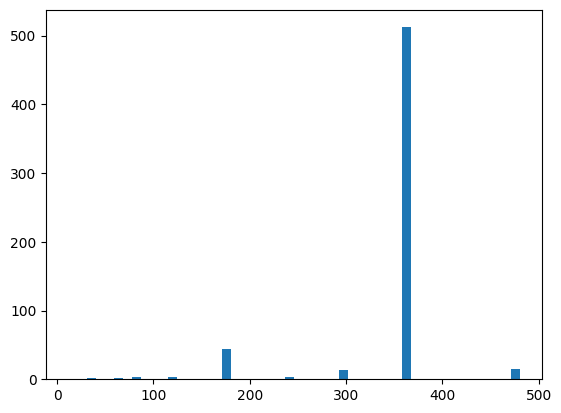

In [5]:
credit_df['Loan_Amount_Term'].value_counts(normalize=True) 
plt.hist(credit_df['Loan_Amount_Term'], 50) #Mostrar su HISTOGRAMA

Text(0.5, 1.0, 'Plot of the Loan Amount')

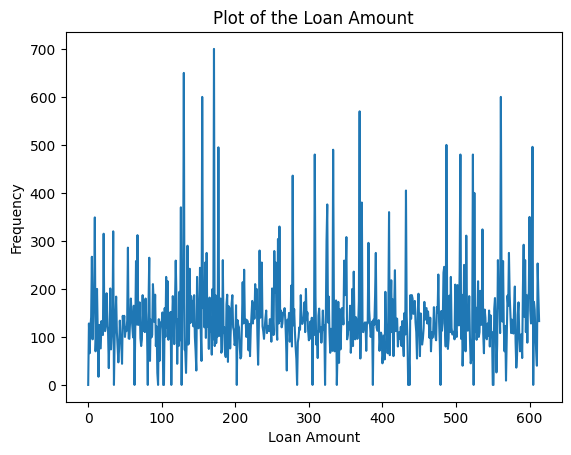

In [6]:
#PLOTEO DE GRÁFICO DE LÍNEAS
plt.plot(credit_df.LoanAmount) 
plt.xlabel('Loan Amount') 
plt.ylabel('Frequency') 
plt.title("Plot of the Loan Amount") 

El Importe del Préstamo está muy sesgado, por lo que eliminamos esta variable.

In [7]:
credit_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

**Tratamiento de los valores faltantes**

El valor faltante de cada variable se reemplaza por 0

In [8]:
credit_df = credit_df.fillna('0') 
#credit_df = credit_df.replace({'NaN':credit_df.median()}) 
credit_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban,1


**Analizar la distribución de nuestras variables**

In [9]:
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Diagramas de caja (boxplots)**

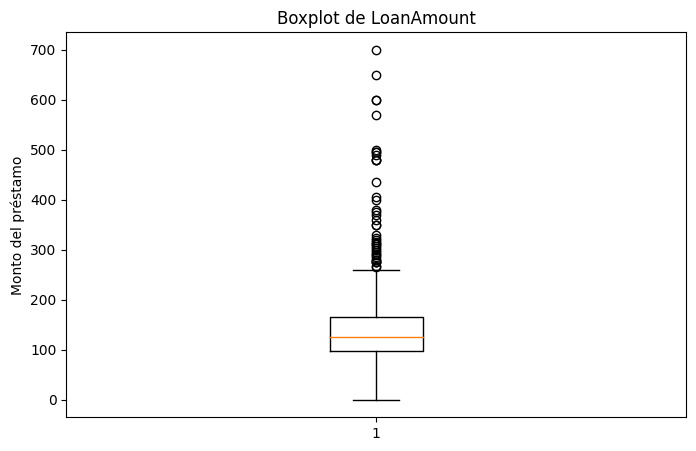

In [10]:
import matplotlib.pyplot as plt

#display(credit_df)

#plt.boxplot(credit_df.LoanAmount)

plt.figure(figsize=(8, 5))
plt.boxplot(credit_df['LoanAmount'].dropna())
plt.title('Boxplot de LoanAmount')
plt.ylabel('Monto del préstamo')
plt.show()

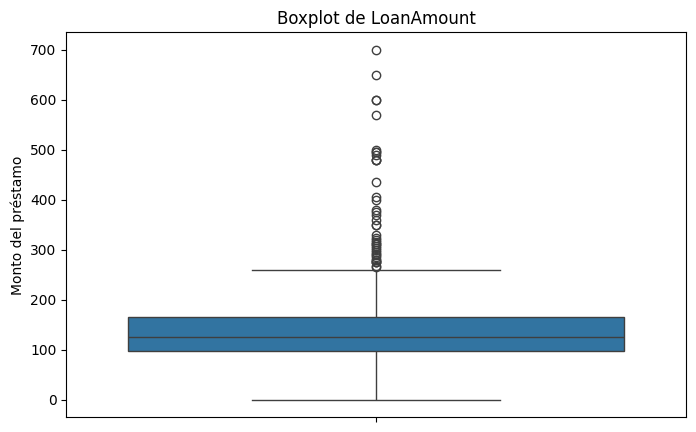

In [11]:
#BOXPLOT CON SEABORN

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(y='LoanAmount', data=credit_df)
plt.title('Boxplot de LoanAmount')
plt.ylabel('Monto del préstamo')
plt.show()


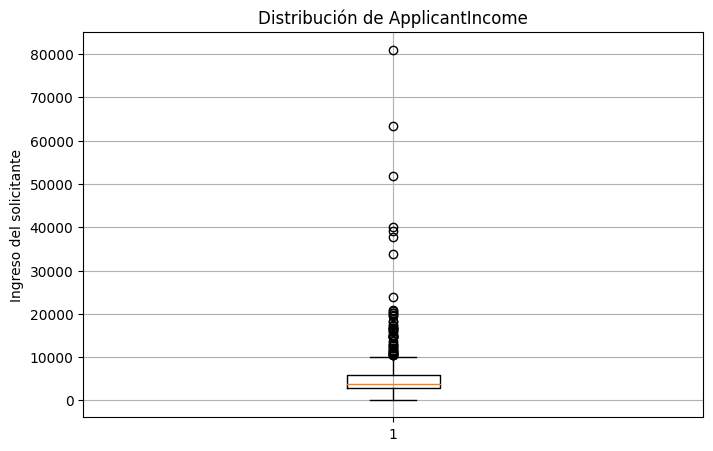

In [12]:
plt.figure(figsize=(8, 5))
plt.boxplot(credit_df['ApplicantIncome'].dropna())
plt.title('Distribución de ApplicantIncome')
plt.ylabel('Ingreso del solicitante')
plt.grid(True)
plt.show()

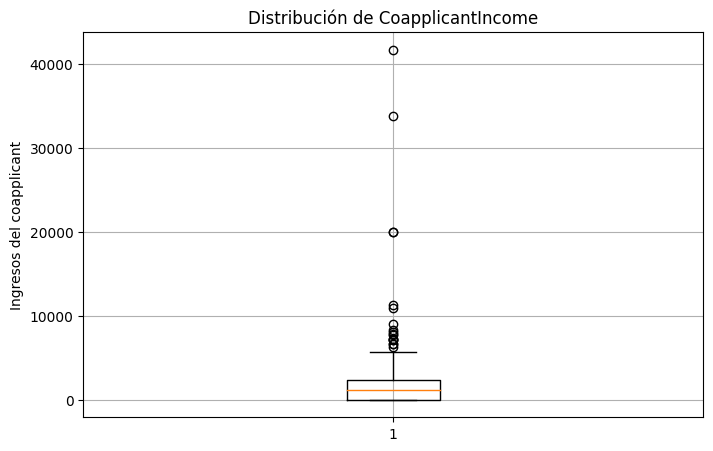

In [13]:
plt.figure(figsize=(8, 5))
plt.boxplot(credit_df['CoapplicantIncome'].dropna())
plt.title('Distribución de CoapplicantIncome')
plt.ylabel('Ingresos del coapplicant')
plt.grid(True)
plt.show()

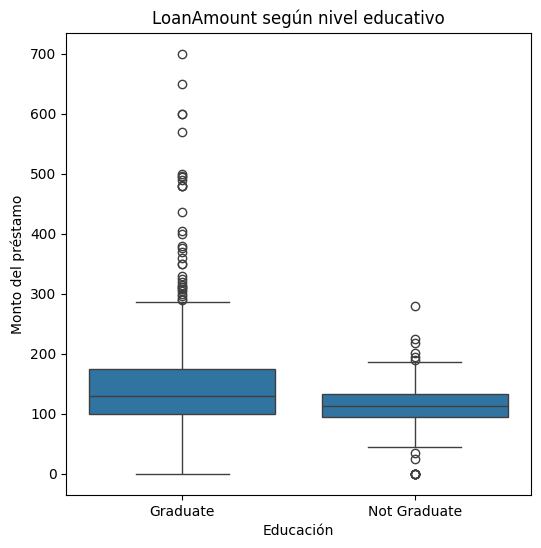

In [14]:
#Comparar por grupos

plt.figure(figsize=(6, 6))
sns.boxplot(x='Education', y='LoanAmount', data=credit_df)
plt.title('LoanAmount según nivel educativo')
plt.xlabel('Educación')
plt.ylabel('Monto del préstamo')
plt.show()

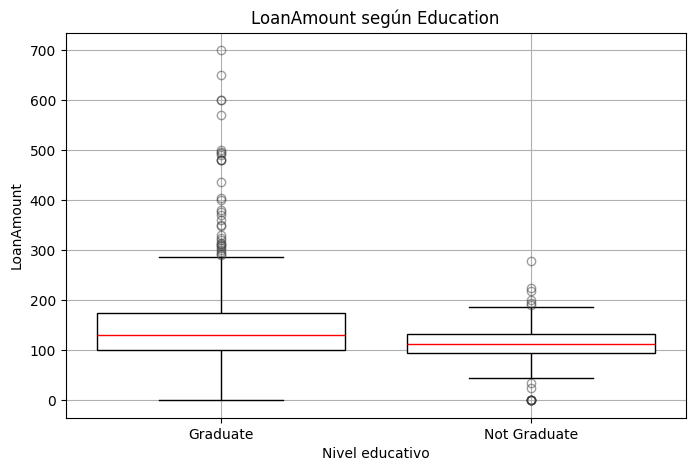

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

#Similar a R!
sns.boxplot(
    x='Education', y='LoanAmount', data=credit_df,
    boxprops=dict(facecolor='white', edgecolor='black'),
    medianprops=dict(color='red'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black'),
    flierprops=dict(marker='o', color='black', alpha=0.5)
)
plt.title('LoanAmount según Education')
plt.xlabel('Nivel educativo')
plt.ylabel('LoanAmount')
plt.grid(True)
plt.show()


En todos los diagramas **se muestra una fuerte presencia de datos atípicos (outliers)**.

Analicemos la variable destino "Estado del préstamo" (Loan_Status)

In [16]:
#inspeccionar las columnas y su tipo

credit_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Credit_History        object
Property_Area         object
Loan_Status            int64
dtype: object

In [17]:
#select_dtypes() para seleccionar todas las columnas numéricas automáticamente

numeric_cols = credit_df.select_dtypes(include='number').columns
credit_df.groupby("Loan_Status")[numeric_cols].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
Loan_Status,,,,
0,5446.078125,1877.807292,142.557292,0.0
1,5384.068720,1504.516398,140.533175,1.0


In [18]:
#Convert X & Y variable to a categorical variable as relevant 

credit_df['Loan_Status'] = credit_df['Loan_Status'].astype('category') 
credit_df['Credit_History'] = credit_df['Credit_History'].astype('category') 

In [19]:
# Verifica los tipos de datos presentes en los datos actuales

credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             614 non-null    object  
 1   Married            614 non-null    object  
 2   Dependents         614 non-null    object  
 3   Education          614 non-null    object  
 4   Self_Employed      614 non-null    object  
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         614 non-null    int64   
 8   Credit_History     614 non-null    category
 9   Property_Area      614 non-null    object  
 10  Loan_Status        614 non-null    category
dtypes: category(2), float64(1), int64(2), object(6)
memory usage: 44.7+ KB


In [20]:
#VERIFICAR EL EQUILIBRIO DE LOS DATOS

#Calculate baseline proportion - ratio of Yes to No to identify data imbalance 
prop_Y = credit_df['Loan_Status'].value_counts(normalize=True) 
print(prop_Y) 

Loan_Status
1    0.687296
0    0.312704
Name: proportion, dtype: float64


Parece haber un ligero desequilibrio en el conjunto de datos, ya que una clase representa el 31.28 % y la otra el 68.72 %. 

In [21]:
## Define X and Y variables 
X = credit_df.drop('Loan_Status', axis=1) 
Y = credit_df[['Loan_Status']]

**Usamos la codificación one-hot para convertir vars categ. en num**

In [22]:
#Convert categorical variables to dummy variables 
X = pd.get_dummies(X, drop_first=True)

**Dividimos en conjuntos de entrenamiento y prueba con 70:30**

In [23]:
##Split into training and test set 
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30) 

**Construir el modelo de reg. logística**

In [24]:
print(X_train.dtypes)
print(y_train.dtypes)

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                   int64
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool
Married_Yes                   bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education_Not Graduate        bool
Self_Employed_No              bool
Self_Employed_Yes             bool
Credit_History_1.0            bool
Credit_History_0              bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object
Loan_Status    category
dtype: object


In [25]:
print(y_train.Loan_Status)

74     1
46     1
280    0
338    0
10     1
      ..
537    1
219    1
315    1
593    1
274    1
Name: Loan_Status, Length: 429, dtype: category
Categories (2, int64): [0, 1]


Pese a que está en notación binaria, la variable objetivo Y (Loan Status) sigue siendo de tipo category. Por lo tanto, hay que convertirla a int o float.

In [26]:
y_train = y_train["Loan_Status"].astype(float)

In [27]:
print(y_train.dtypes)

float64


In [28]:
print(y_train)

74     1.0
46     1.0
280    0.0
338    0.0
10     1.0
      ... 
537    1.0
219    1.0
315    1.0
593    1.0
274    1.0
Name: Loan_Status, Length: 429, dtype: float64


In [29]:
print(X_train.dtypes)

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                   int64
Gender_Female                 bool
Gender_Male                   bool
Married_No                    bool
Married_Yes                   bool
Dependents_1                  bool
Dependents_2                  bool
Dependents_3+                 bool
Education_Not Graduate        bool
Self_Employed_No              bool
Self_Employed_Yes             bool
Credit_History_1.0            bool
Credit_History_0              bool
Property_Area_Semiurban       bool
Property_Area_Urban           bool
dtype: object


In [30]:
#Asegurarse de que X_train esté completamente en float
X_train = X_train.astype(float)

#Asegurarse de que y_train esté en float
y_train = y_train.astype(float)

In [31]:
#Agregar constante DESPUÉS de convertir
import statsmodels.api as sm
X_train = sm.add_constant(X_train)

#Ajustar el modelo
logit = sm.Logit(y_train, X_train)
lg = logit.fit()
print(lg.summary())

         Current function value: 0.451558
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                          Logit   Df Residuals:                      411
Method:                           MLE   Df Model:                           17
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.2811
Time:                        20:09:59   Log-Likelihood:                -193.72
converged:                      False   LL-Null:                       -269.47
Covariance Type:            nonrobust   LLR p-value:                 1.246e-23
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      12.2783   3164.454      0.004      0.997   -6189.938    6214.494
ApplicantIncome          3

C:\Users\Tacos\.conda\envs\ai_security\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
#Summary of logistic regression 
from scipy import stats 
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) 
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                          Logit   Df Residuals:                      411
Method:                           MLE   Df Model:                           17
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.2811
Time:                        20:09:59   Log-Likelihood:                -193.72
converged:                      False   LL-Null:                       -269.47
Covariance Type:            nonrobust   LLR p-value:                 1.246e-23
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      12.2783   3164.454      0.004      0.997   -6189.938    6214.494
ApplicantIncome          3.925e-06   2.63e-05      0.149      0.881   -4.76e-05    5.54e-05


El pseudo r-cuadrado muestra que solo el 26% de la variación 
total de los datos se explica por el modelo. ¡Realmente no es un buen modelo!

In [33]:
#Calculate Odds Ratio, probability 
##create a data frame to collate Odds ratio, probability and p-value of the coef 
log_coef = pd.DataFrame(lg.params, columns=['coef']) 
log_coef.loc[:, "Odds_ratio"] = np.exp(log_coef.coef) 
log_coef['probability'] = log_coef['Odds_ratio']/(1+log_coef['Odds_ratio']) 
log_coef['pval']=lg.pvalues 
pd.options.display.float_format = '{:.2f}'.format

 Filtrar todas las variables independientes por valor p significativo (valor p < 
0.1) y las ordenaremos de forma descendente por razón de probabilidades

In [34]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio 
log_coef = log_coef.sort_values(by="Odds_ratio", ascending=False) 
pval_filter = log_coef['pval']<=0.1 
log_coef[pval_filter]

,coef,Odds_ratio,probability,pval
Credit_History_1.0,3.72,41.13,0.98,0.00
Credit_History_0,3.47,32.28,0.97,0.00
Property_Area_Semiurban,1.01,2.75,0.73,0.00
Education_Not Graduate,-0.63,0.53,0.35,0.04


Si analizamos los datos, observamos que los clientes con un historial crediticio de 1 tienen una probabilidad del 98% de incumplir el préstamo, mientras que los que tienen un historial de 0 tienen una probabilidad del 98%. 
De igual forma, los clientes en zonas semiurbanas tienen una probabilidad (odds) de 
incumplir 2.40 veces mayor que el resto

**Ajustando el modelo con los datos de entrenamiento**

In [35]:
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)

LogisticRegression()

**Predicción**

In [36]:
#Predict for train set 
pred_train = log_reg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix 
mat_train = confusion_matrix(y_train,pred_train) 
print("confusion matrix = \n",mat_train) 

confusion matrix = 
 [[ 66  72]
 [ 21 270]]


Realizamos la predicción para el conjunto de prueba

In [37]:
print(X_train)
print("######## \n")
print("######## \n")
print("######## \n")
print(X_test)

     const  ApplicantIncome  CoapplicantIncome  LoanAmount  Gender_Female  \
74    1.00          5266.00            1774.00      187.00           0.00   
46    1.00          5649.00               0.00       44.00           0.00   
280   1.00          4053.00            2426.00      158.00           0.00   
338   1.00          1830.00               0.00        0.00           1.00   
10    1.00          3200.00             700.00       70.00           0.00   
..     ...              ...                ...         ...            ...   
537   1.00          3617.00               0.00      107.00           0.00   
219   1.00          4283.00            2383.00      127.00           1.00   
315   1.00          3399.00            1640.00      111.00           0.00   
593   1.00          3859.00            3300.00      142.00           0.00   
274   1.00          3900.00               0.00       90.00           0.00   

     Gender_Male  Married_No  Married_Yes  Dependents_1  Dependents_2  \
74

X_train tiene 18 columnas, incluyendo 'const'.

X_test tiene 17 columnas, y no incluye 'const'.

Además, las columnas de X_test son de tipo booleano (True / False), mientras que en X_train son valores numéricos (0.0 / 1.0), lo cual también puede generar problemas de compatibilidad en scikit-learn

In [38]:
#Eliminar la constante
if 'const' in X_train.columns:
    X_train = X_train.drop(columns=['const'])

#Convertir booleanos a enteros
X_test = X_test.astype(int)

#Alinear columnas
X_test = X_test[X_train.columns]

In [39]:
print(X_train)
print("######## \n")
print("######## \n")
print("######## \n")
print(X_test)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Gender_Female  \
74           5266.00            1774.00      187.00           0.00   
46           5649.00               0.00       44.00           0.00   
280          4053.00            2426.00      158.00           0.00   
338          1830.00               0.00        0.00           1.00   
10           3200.00             700.00       70.00           0.00   
..               ...                ...         ...            ...   
537          3617.00               0.00      107.00           0.00   
219          4283.00            2383.00      127.00           1.00   
315          3399.00            1640.00      111.00           0.00   
593          3859.00            3300.00      142.00           0.00   
274          3900.00               0.00       90.00           0.00   

     Gender_Male  Married_No  Married_Yes  Dependents_1  Dependents_2  \
74          1.00        0.00         1.00          0.00          0.00   
46          1

In [40]:
import statsmodels.api as sm

# Asegura que el orden de columnas sea igual y que esté presente 'const'
X_test = sm.add_constant(X_test, has_constant='add')

confusion matrix = 
 [[ 24  30]
 [ 14 117]]


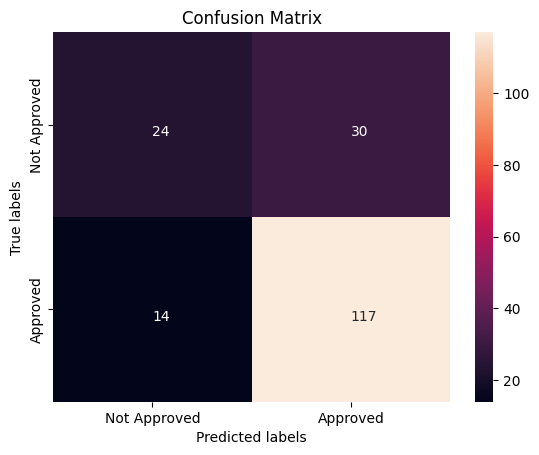

In [41]:
#Realizar predicción
pred_test = log_reg.predict(X_test) 
mat_test = confusion_matrix(y_test,pred_test) 
print("confusion matrix = \n",mat_test)

#PLOTEO
ax= plt.subplot() 
ax.set_ylim(2.0, 0) 
annot_kws = {"ha": 'left',"va": 'top'} 

sns.heatmap(mat_test, annot=True, ax = ax, fmt= 'g', 
annot_kws=annot_kws); #annot=True to annotate cells 

# labels, title and ticks 
ax.set_xlabel('Predicted labels'); 
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Approved', 'Approved']); 
ax.yaxis.set_ticklabels(['Not Approved', 'Approved']); 

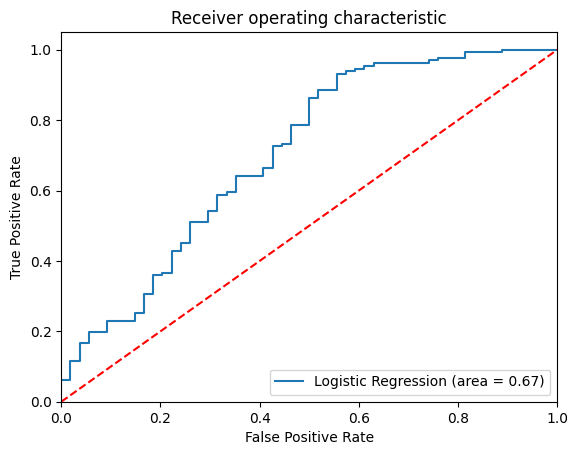

In [42]:
#AUC ROC curve 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 

logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1]) 
plt.figure() 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show() 

In [43]:
auc_score = metrics.roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]) 
round( float( auc_score ), 2 ) 

0.7

In [44]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train, has_constant='add')

In [45]:
score = log_reg.score(X_train, y_train) 
print(score) 

0.7832167832167832


In [46]:
score = log_reg.score(X_test, y_test) 
print(score) 

0.7621621621621621


Aunque no obtuve los mismos resultados que los presentados en el PDF si obtuve resultados similares. El accuracy fue del 80%. El área de la curva ROC fue ligeramente mejor que la del PDF, mi área en lugar de ser de 0.63 es de **0.73**.
En términos generales no luce tan mal el modelo, aunque es importante resaltar que en la matriz de confusión se observa que tiende más a los falsos negativos que a los falsos positivos.

C:\Users\Tacos\.conda\envs\ai_security\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


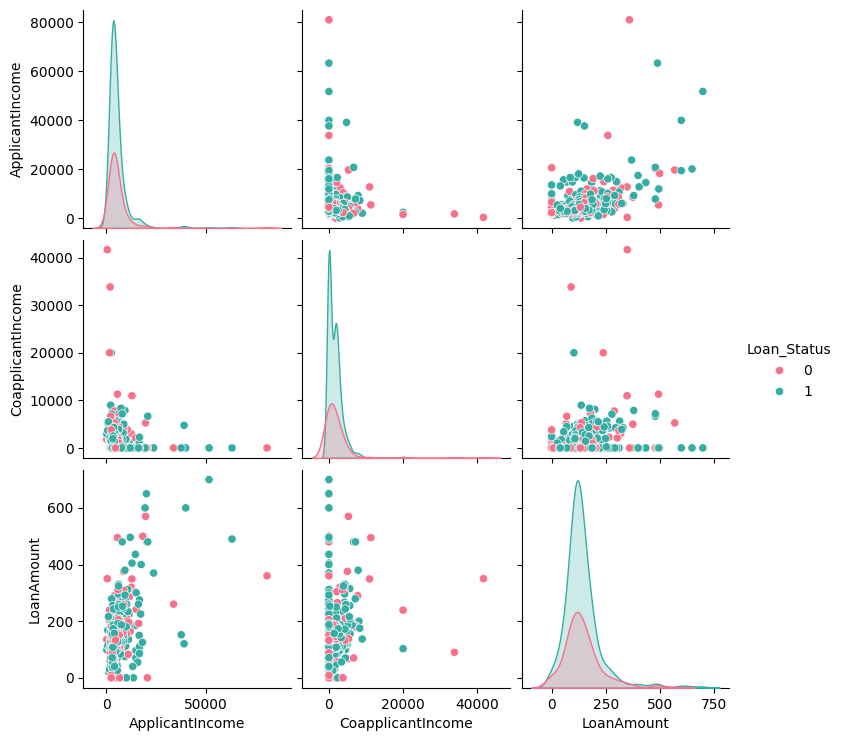

In [47]:
#PLOTEO CHIDO
import seaborn as sns 

#plt.figure(figsize=(8, 5))
sns.pairplot(credit_df, hue="Loan_Status", palette="husl")

**################################################**

**Naïve Bayes | Bayes ingenuo para la clasificación**

Objetivo empresarial: Contamos con datos censales y el objetivo es predecir si los ingresos de una persona superan los 50,000 dólares al año, basándonos en el valor de otros atributos.

Descripción de las variables: 

    • Age: continua 
    • Workclass: Privada, Autónomo no inscrito, Autónomo inscrito, Gobierno federal, Gobierno local, Gobierno estatal, Sin sueldo, Nunca ha trabajado. 
    • fnlwgt: continua. 
    • Education: Licenciatura, Estudios universitarios parciales, 11.º, Graduado de secundaria, Escuela profesional, Asociado en ACDM, Asociado en vocación profesional, 9.º, 7.º-8.º, 12.º, Maestría, 1.º-4.º, 10.º, Doctorado, 5.º-6.º, Preescolar. 
    • Education-num: continua.  
    • Marital-status: Casado/a con cónyuge civil, Divorciado/a, Soltero/a, Separado/a, Viudo/a, Casado/a con cónyuge ausente, Casado/a con cónyuge no casado/a. 
    • Occupation: Soporte técnico, Reparación de artesanías, Otros servicios, Ventas, Gerencia ejecutiva, Especialista profesional, Manipuladores/as de limpieza, Inspección de maquinaria, Administración, Agricultura y pesca, Transporte, Servicio doméstico, Servicio de protección, Fuerzas Armadas.
    • Relationship: Esposa, Hijo/a propio/a, Esposo/a, No familiar, Otro/a familiar, Soltero/a. 
    • Race: Blanco/a, Asiático/a de las Islas del Pacífico, Amerindio/a esquimal, Otro/a, Negro/a. 
    • Sex: Femenino, Masculino. 
    • Capital-gain: Continuas. 
    • Capital-loss: Continuas. 
    • Hours-per-week: continuas. 
    • Native-country: Estados Unidos, Camboya, Inglaterra, Puerto Rico, Canadá, Alemania, EE. UU. (Guam, Islas Vírgenes de EE. UU., etc.), India, Japón, Grecia, China del Sur, Cuba, Irán, Honduras, Filipinas, Italia, Polonia, Jamaica, Vietnam, México, Portugal, Irlanda, Francia, República Dominicana, Laos, Ecuador, Taiwán, Haití, Colombia, Hungría, Guatemala, Nicaragua, Escocia, Tailandia, Yugoslavia, El Salvador, Trinidad y Tobago, Perú, Hong Kong, Países Bajos. 
    • Clase: >50K, <=50K 

In [48]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
# used to split the dataset into train and test datasets 
from sklearn.naive_bayes import GaussianNB 
# To model the Gaussian Naive Bayes classifier 
from sklearn.metrics import accuracy_score 
# To calculate the accuracy score of the model

In [49]:
census_df = pd.read_csv('C:\\Users\\Tacos\\OneDrive\\Documentos\\Universidad\\Curso - Datos, ciberseguridad e inteligencia artificial\\Actividades\\11 adult.data', header = None, delimiter=' *, *', engine='python') 

In [50]:
# Adding headers to the dataframe  
census_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
'hours_per_week', 'native_country', 'income'] 

In [51]:
#IMPRIMIR EL # DE FILAS DEL DATAFRAME

# Number of records(rows) in the dataframe 
len(census_df) 

32561

In [52]:
#VERIFICAR PRESENCIA DE VALORES NULOS

# Handling missing data 
# Test whether there is any null value in our dataset or not. We can do this using isnull() method. 
census_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Puede haber algunas variables categóricas con valores faltantes. Comprobaremos que, a veces, tienen "?" en lugar de valores faltantes. 

In [53]:
for value in ['workclass','education','marital_status','occupation','relationship','race','sex', 'native_country','income']: 
    print(value,":", sum(census_df[value] == '?'))

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
income : 0


Ahora procederemos al preprocesamiento de datos. Primero, crearemos una copia profunda de nuestro frame de datos

In [54]:
## Deep copy of adult_df 
census_df_rev = census_df.copy(deep=True) 

Antes de gestionar los valores faltantes, necesitamos algunas estadísticas de resumen 
de nuestro frame de datos. Para ello, podemos usar el método describe(). Este método permite generar diversas estadísticas de resumen, excluyendo los valores NaN

In [55]:
census_df_rev.describe() 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


**Resumen de todos los atributos (incluyendo NAs)**

In [56]:
census_df_rev.describe(include= 'all') 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.00,32561,32561.00,32561,32561.00,32561,32561,32561,32561,32561,32561.00,32561.00,32561.00,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.58,NaN,189778.37,NaN,10.08,NaN,NaN,NaN,NaN,NaN,1077.65,87.30,40.44,NaN,NaN
std,13.64,NaN,105549.98,NaN,2.57,NaN,NaN,NaN,NaN,NaN,7385.29,402.96,12.35,NaN,NaN
min,17.00,NaN,12285.00,NaN,1.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,1.00,NaN,NaN
25%,28.00,NaN,117827.00,NaN,9.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,NaN
50%,37.00,NaN,178356.00,NaN,10.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,40.00,NaN,NaN
75%,48.00,NaN,237051.00,NaN,12.00,NaN,NaN,NaN,NaN,NaN,0.00,0.00,45.00,NaN,NaN


**Imputaremos los valores categóricos faltantes**

In [57]:
for value in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']:
    
    # Accede al valor de la moda
    replaceValue = census_df_rev.describe(include='all')[value].iloc[2]
    
    # Reemplaza los '?' con .loc para modificar el DataFrame original sin warning
    census_df_rev.loc[census_df_rev[value] == '?', value] = replaceValue


**Codificación one-hot para convertir todas las variables categóricas a numéricas**

In [58]:
# Hot Encoding  
le = preprocessing.LabelEncoder() 
workclass_category = le.fit_transform(census_df.workclass) 
education_category = le.fit_transform(census_df.education) 
marital_category   = le.fit_transform(census_df.marital_status) 
occupation_category = le.fit_transform(census_df.occupation) 
relationship_category = le.fit_transform(census_df.relationship) 
race_category = le.fit_transform(census_df.race) 
sex_category = le.fit_transform(census_df.sex) 
native_country_category = le.fit_transform(census_df.native_country) 

In [59]:
#initialize the encoded categorical columns 
census_df_rev['workclass_category'] = workclass_category 
census_df_rev['education_category'] = education_category 
census_df_rev['marital_category'] = marital_category 
census_df_rev['occupation_category'] = occupation_category 
census_df_rev['relationship_category'] = relationship_category 
census_df_rev['race_category'] = race_category 
census_df_rev['sex_category'] = sex_category 
census_df_rev['native_country_category'] = native_country_category 

In [60]:
census_df_rev.head() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,income,workclass_category,education_category,marital_category,occupation_category,relationship_category,race_category,sex_category,native_country_category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,7,9,4,1,1,4,1,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,6,9,2,4,0,4,1,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,4,11,0,6,1,4,1,39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,4,1,2,6,0,2,1,39
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,4,9,2,10,5,2,0,5


In [61]:
#drop the old categorical columns from dataframe 
dummy_fields = ['workclass','education','marital_status','occupation','relationship','race', 
'sex', 'native_country'] 
census_df_rev = census_df_rev.drop(dummy_fields, axis = 1) 

In [62]:
census_df_rev.head() 

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_category,education_category,marital_category,occupation_category,relationship_category,race_category,sex_category,native_country_category
0,39,77516,13,2174,0,40,<=50K,7,9,4,1,1,4,1,39
1,50,83311,13,0,0,13,<=50K,6,9,2,4,0,4,1,39
2,38,215646,9,0,0,40,<=50K,4,11,0,6,1,4,1,39
3,53,234721,7,0,0,40,<=50K,4,1,2,6,0,2,1,39
4,28,338409,13,0,0,40,<=50K,4,9,2,10,5,2,0,5


In [63]:
#reindexar todas las columnas con reindex

census_df_rev = census_df_rev.reindex(['age', 'workclass_category', 'fnlwgt', 
                                       'education_category', 'education_num', 'marital_category', 'occupation_category', 
                                       'relationship_category', 'race_category', 'sex_category', 'capital_gain', 
                                       'capital_loss', 'hours_per_week', 'native_country_category', 'income'], axis= 1)  

census_df_rev.head(5) 

#OPCIÓN 2
#census_df_rev = census_df_rev.reindex(columns=[
#    'age', 'workclass_category', 'fnlwgt', 
#    'education_category','education_num', 'marital_category', 'occupation_category', 
#    'relationship_category', 'race_category', 'sex_category', 'capital_gain', 
#    'capital_loss', 'hours_per_week', 'native_country_category', 'income'
#])

,age,workclass_category,fnlwgt,education_category,education_num,marital_category,occupation_category,relationship_category,race_category,sex_category,capital_gain,capital_loss,hours_per_week,native_country_category,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


In [64]:
#Organizar los datos en variables dependientes y VARIABLE OBJETIVO
X = census_df_rev.values[:,:14] 
Y = census_df_rev.values[:,14]

In [65]:
#Dividimos los datos en un SPLIT DE 75:25
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)

**Ajustando el modelo Gaussiano Bayesiano**

In [66]:
clf = GaussianNB() 
clf.fit(X_train, Y_train) 

GaussianNB() 

GaussianNB()

**Realizar predicciones**

In [67]:
Y_pred = clf.predict(X_test)

In [68]:
#Verificar la PRECISIÓN del modelo
accuracy_score(Y_test, Y_pred, normalize = True)

0.7903205994349588

**################################################**

**kNN | k-vecinos más cercanos para la clasificación**

knn es un modelo no paramétrico; construye un “modelo” y la clasificación se basa en una mayoría simple de votos de los vecinos.  Sin embargo, podría no ser la mejor opción para un conjunto de datos no limpio o donde las clases objetivo no son claramente claras. Si las clases objetivo no están claramente delimitadas, se produce una confusión evidente al obtener la mayoría de votos. knn también puede utilizarse en problemas de regresión para predecir una variable continua.

En el caso de la regresión, el resultado final será el promedio de los valores de los vecinos, y ese promedio se asignará a la variable objetivo.

Los pasos que se siguen en el modelo de k vecinos más cercanos son los siguientes:

    1. Se recibe el conjunto de datos sin procesar y sin clasificar con el que se trabajará. 
    2. Se selecciona una matriz de distancias (Euclídea, Manhattan o Minkowski).
    3. Se calcula la distancia entre los nuevos puntos de datos y los puntos de entrenamiento clasificados conocidos. 
    4. El número de vecinos a considerar se define por el valor de “k”. 
    5. A continuación, se compara con la lista de clases con la distancia más corta y se cuenta el número de veces que aparece cada clase. 
    6. La clase con más votos gana. Esto significa que la clase con la mayor frecuencia y que ha aparecido el mayor número de veces se asigna al punto de datos desconocido.

Consejo: Al abordar un problema knn, generalmente comenzamos con la distancia euclidiana. En la mayoría de los problemas empresariales, cumple su propósito.

Existen otras formas de knn:

**Clasificador de vecinos por radio**
    
    1. Este clasificador implementa el aprendizaje basado en un número de vecinos. Los vecinos se encuentran dentro de un radio fijo r de cada punto de entrenamiento, donde r es un valor de punto flotante especificado por el usuario. 
    2. Preferimos este método cuando el muestreo de datos no es uniforme. Sin embargo, en el caso de un número considerable de variables independientes y un conjunto de datos dispersos, sufre la maldición de la dimensionalidad (curse of dimensionality).

**Árbol KD - vecino más cercano**

    1. Este método es eficaz si el conjunto de datos es grande, pero el número de variables independientes es menor. 
    2. El método requiere menos tiempo de cálculo que otros métodos. 

**Objetivo de negocio**

Debemos ajustar un algoritmo de k vecinos más cercanos para detectar intrusiones en la red. 

In [2]:
%matplotlib inline 
import pandas as pd 
import numpy as np 
import os,sys 
cwd = os.getcwd() 
print(cwd) 
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\Tacos\OneDrive\Documentos\Universidad\Curso - Datos, ciberseguridad e inteligencia artificial\Actividades


In [3]:
network_data = pd.read_csv('C:\\Users\\Tacos\\OneDrive\\Documentos\\Universidad\\Curso - Datos, ciberseguridad e inteligencia artificial\\Actividades\\11 Network_Intrusion.csv') 
network_data.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
network_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [5]:
network_data.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [6]:
network_data.isnull().sum() 

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

**Analicemos la distribución de clases**

In [7]:
network_data["class"].value_counts(normalize=True)

class
normal     0.53386
anomaly    0.46614
Name: proportion, dtype: float64

Convertir vars. categ. en num. con one-hot encodeing

In [8]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder() 
network_data['class'] = label_encoder.fit_transform(network_data['class']) 
network_data['protocol_type'] = label_encoder.fit_transform(network_data['protocol_type']) 
network_data['service'] = label_encoder.fit_transform(network_data['service']) 
network_data['flag'] = label_encoder.fit_transform(network_data['flag']) 

In [9]:
network_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [10]:
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 

X_std = pd.DataFrame(StandardScaler().fit_transform 
(network_data)) 
X_std.columns = network_data.columns 

Dividir los datos con un split de 80:20

In [11]:
import numpy as np 
from sklearn.model_selection import train_test_split  # Updated import statement 

X = np.array(network_data.iloc[:, 1:5])  #Transform data into features 
y = np.array(network_data['class'])   #Transform data into targets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) 

In [12]:
print(X_train.shape) 
print(y_train.shape)

(20153, 4)
(20153,)


In [13]:
print(X_test.shape) 
print(y_test.shape) 

(5039, 4)
(5039,)


**Entrenamos el modelo** con los datos de entrenamiento e iteraremos con diferentes valores de k = 3, 5, 9.

In [14]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 

# instantiate learning model (k = 3) 
knn_model = KNeighborsClassifier(n_neighbors = 3) 

#Fitting the model 
knn_model.fit(X_train, y_train) 
y_pred = knn_model.predict(X_test) # predict the response

print(accuracy_score(y_test, y_pred)) # Evaluate accuracy 

knn_model = KNeighborsClassifier(n_neighbors=5) # With k = 5 
knn_model.fit(X_train, y_train) # Fitting the model 
y_pred = knn_model.predict(X_test) # Predict the response 
print(accuracy_score(y_test, y_pred)) # Evaluate accuracy 

knn_model = KNeighborsClassifier(n_neighbors=9) 
knn_model.fit(X_train, y_train) # Fitting the model 
y_pred = knn_model.predict(X_test) # Predict the response 
print(accuracy_score(y_test, y_pred)) # Evaluate accuracy 

0.9908712046040881
0.9882913276443739
0.9869021631276047


Ejecutaremos el modelo knn con un número de vecinos de 1, 3, 5... 19 y luego encontraremos 
el número óptimo de vecinos con base en el menor error de clasificación errónea. 

In [15]:
k_list = list(range(1,20)) # creating odd list of K for KNN 
k_neighbors = list(filter(lambda x: x % 2 != 0, k_list)) 

# subsetting just the odd ones 
ac_scores = [] # empty list that will hold accuracy scores 

# perform accuracy metrics for values from 1,3,5....19 
for k in k_neighbors: 
    knn_model = KNeighborsClassifier(n_neighbors=k)  
    knn_model.fit(X_train, y_train) 
    y_pred = knn_model.predict(X_test) # predict the response  
    scores = accuracy_score(y_test, y_pred) # evaluate accuracy  
    ac_scores.append(scores) 

# changing to misclassification error 
MSE = [1 - x for x in ac_scores] 

# determining best k 
optimal_k = k_neighbors[MSE.index(min(MSE))] 
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


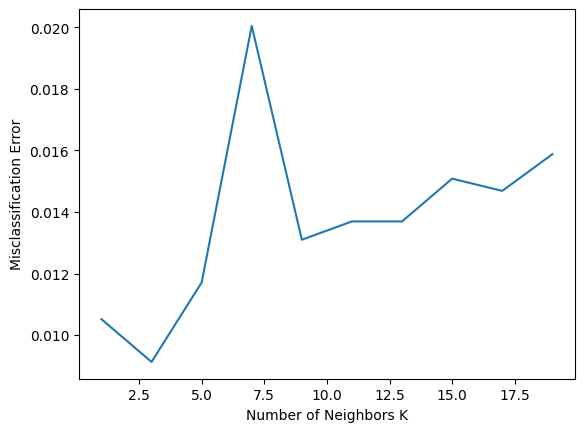

In [16]:
# impacto de diferentes valores de k en el error de clasificación
import matplotlib.pyplot as plt 

# plot misclassification error vs k 
plt.plot(k_neighbors, MSE) 
plt.xlabel('Number of Neighbors K') 
plt.ylabel('Misclassification Error') 
plt.show()

In [17]:
#Use k=3 as the final model for prediction 
knn = KNeighborsClassifier(n_neighbors = 3) 

# fitting the model 
knn.fit(X_train, y_train)

# predict the response 
y_pred = knn.predict(X_test)

# evaluate accuracy 
print(accuracy_score(y_test, y_pred)) 
print(recall_score(y_test, y_pred)) 

0.9908712046040881
0.9908116385911179


Nuevamente mis resultados difieren de los mostrados en el PDF. En general, las diferencias son leves, a excepción del ploteo del impacto en el error de clasificación de los diferentes valores de k, aunque ello no supone un problema ya que k=3 sigue siendo el k óptimo. 
Antes de concluir esta actividad me gustaría cerrar con broche de oro ya que si bien hicimos algunas cosas de kNN no siento que lo que hicimos nos brinde un nuevo conocimiento o entendimiento del dataset, es decir, siento que dejamos un poco de lado el contexto del problema y nos centramos más en kNN, así que veamos qué se me ocurre para abordar esto.

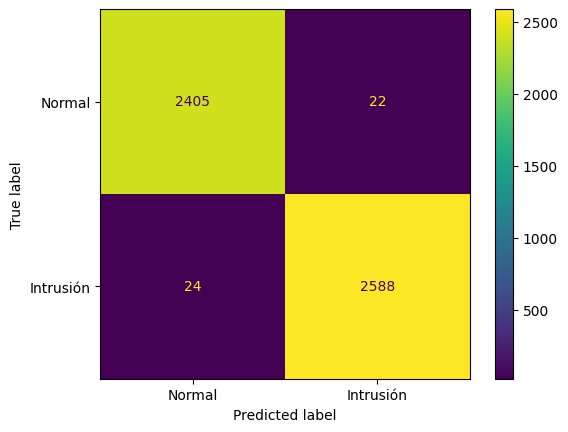

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Intrusión'])
disp.plot()

La matriz de confusión corrobora que la precisión es considerablemente alta, y no parece haber una tendencia significativa hacia los falsos positivos o falsos negativos

In [19]:
print(X_test.shape)
print("----------")
print(X)
print("----------")
print(y)
#print("-----TRAIN-----")
print("----------")
display(X_train)
print("----------")
print(y_train)
#print("----- TEST -----")
print("----------")
display(X_test)
print("----------")
print(y_test)

(5039, 4)
----------
[[  1  19   9 491]
 [  2  41   9 146]
 [  1  46   5   0]
 ...
 [  1  46   1   0]
 [  1  38   5   0]
 [  1  17   5   0]]
----------
[1 1 0 ... 0 0 0]
----------


array([[  1,  22,   9, 224],
       [  1,  38,   5,   0],
       [  2,  46,   9, 105],
       ...,
       [  1,  22,   9, 306],
       [  1,  22,   9, 320],
       [  1,  23,   1,   0]], dtype=int64)

----------
[1 0 1 ... 1 1 0]
----------


array([[  1,  22,   9, 231],
       [  1,  22,   9, 255],
       [  1,  62,   5,   0],
       ...,
       [  1,  22,   9, 222],
       [  1,  46,   5,   0],
       [  1,  22,   9, 292]], dtype=int64)

----------
[1 1 0 ... 1 0 1]


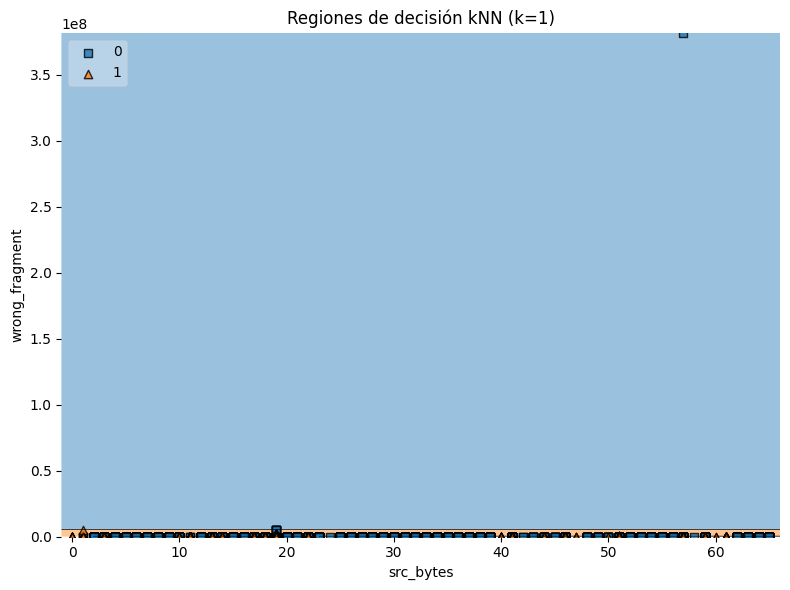

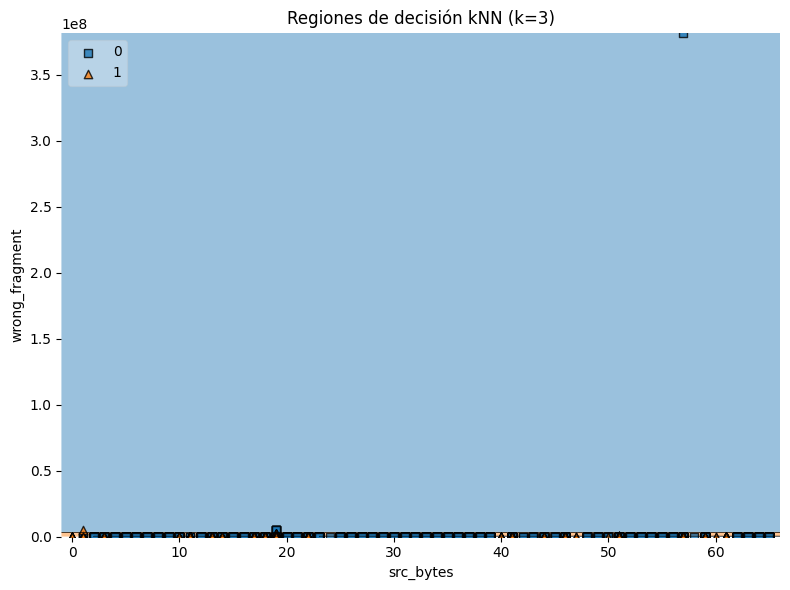

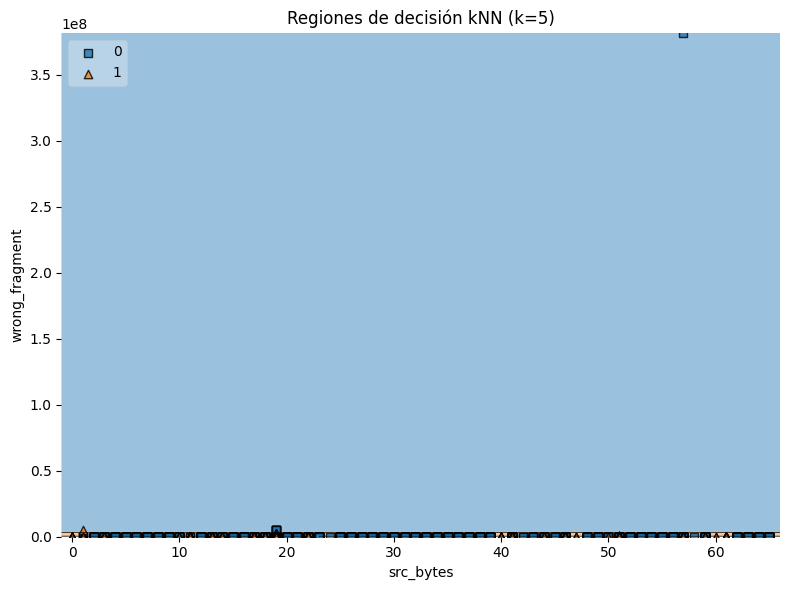

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

# Usa solo dos columnas (por ejemplo col=1 y col=3 → 'src_bytes' y 'wrong_fragment')
X_train_2d = X_train[:, [1, 3]]
y_train = y_train  # Ya está definido

# Probar con distintos valores de k
for k in [1, 3, 5]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_2d, y_train)
    
    # Gráfico de regiones de decisión
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X=X_train_2d, y=y_train, clf=model, legend=2)
    plt.xlabel('src_bytes')
    plt.ylabel('wrong_fragment')
    plt.title(f'Regiones de decisión kNN (k={k})')
    plt.tight_layout()
    plt.show()

Clases únicas: {0, 1}


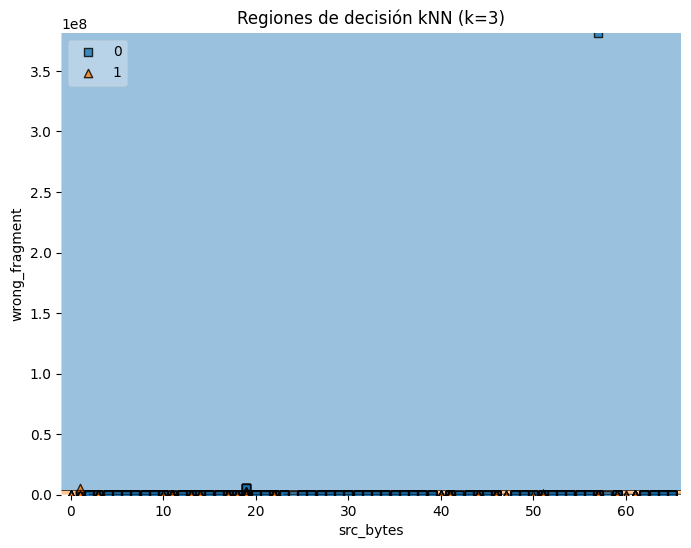

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

# Extraer solo columnas 1 y 3 del conjunto de entrenamiento
X_train_2d = X_train[:, [1, 3]]

# Verifica que tienes al menos 2 clases
print("Clases únicas:", set(y_train))

# Entrenar y graficar kNN con k=3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_2d, y_train)

# Crear el gráfico
fig = plt.figure(figsize=(8, 6))
plot_decision_regions(X=X_train_2d, y=y_train, clf=model, legend=2)
plt.xlabel('src_bytes')
plt.ylabel('wrong_fragment')
plt.title('Regiones de decisión kNN (k=3)')
plt.show()

Bueno, los ploteos obtenidos no salieron como esperaba, supongo que son cosas que pasan cuando recién se empieza en un nuevo lenguaje. No continúo refinando los ploteos porque llevo 2 hrs. haciendo esto último y ya tengo que retirarme.

Así se supone que se vería:

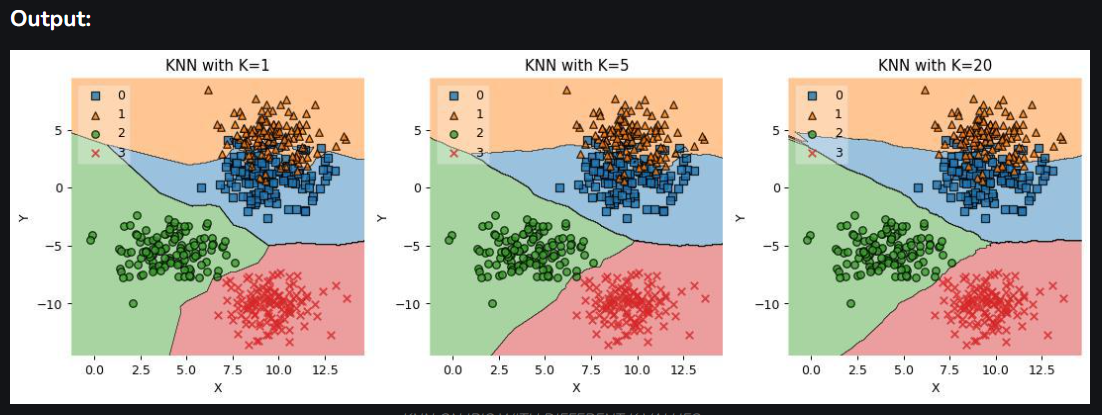

Extraído de: https://www.geeksforgeeks.org/machine-learning/how-to-visualize-knn-in-python/ 